In [1]:
'''
1.시간대별 버스 이용량 분석
    - 기준월 및 기준일자별 버스 이용량분석 비교
    - 기준일 및 시간대별 버스 이용량 분석 비교
    - 기준시간 및 시간(분)별 버스 이용량 분석 비교
    
2. 버스 내 체류시간 분석
    - 기준일 및 시간대별 버스내 체류시간(분) 분석비교
    - 시간 및 승객구분별 빈도분석 비교
    
3. 승하차 정류장별 버스내 체류시간 분석
    - 승하차 정류장별 체류시간(분) 상위 30건 분석비교(내림차순 head(30))
---------------------------------------------------------
모든 폴더 데이터 하나의 csv 파일로 합치기
합치고 전처리
통합 파일로 저장 후 분석

파일명 : 가공데이터폴더 + ipynb파일 ==> 본인이름
'''

'\n1.시간대별 버스 이용량 분석\n    - 기준월 및 기준일자별 버스 이용량분석 비교\n    - 기준일 및 시간대별 버스 이용량 분석 비교\n    - 기준시간 및 시간(분)별 버스 이용량 분석 비교\n    \n2. 버스 내 체류시간 분석\n    - 기준일 및 시간대별 버스내 체류시간(분) 분석비교\n    - 시간 및 승객구분별 빈도분석 비교\n    \n3. 승하차 정류장별 버스내 체류시간 분석\n    - 승하차 정류장별 체류시간(분) 상위 30건 분석비교(내림차순 head(30))\n---------------------------------------------------------\n모든 폴더 데이터 하나의 csv 파일로 합치기\n합치고 전처리\n통합 파일로 저장 후 분석\n\n파일명 : 가공데이터폴더 + ipynb파일 ==> 본인이름\n'

In [2]:
import pandas as pd

### 파일 불러오기

In [3]:
for i in range(1,81,1):
    file_path = 'C:/Users/admin/STUDY/Web/8day_포항버스교통데이터분석/포항/trfcard({})/trfcard.csv'.format(i)
    globals()['df{}'.format(i)] = pd.read_csv(file_path, encoding='utf-8-sig')

In [4]:
df_total = pd.DataFrame()
for i in range(1,81,1):
    file_path = 'C:/Users/admin/STUDY/Web/8day_포항버스교통데이터분석/포항/trfcard({})/trfcard.csv'.format(i)
    df = pd.read_csv(file_path, encoding='utf-8-sig')
    df_total = pd.concat([df_total, df])

In [5]:
df_total.head()

,on_date,off_date,route_name,descr,age_type,trans_yn,addfee_yn,start_bstop,start_gps_x,start_gps_y,end_bstop,end_gps_x,end_gps_y
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,동부초등학교,129.380866,36.062209
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,새마을금고해도지점,129.370626,36.015468
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,오거리,129.366312,36.031816
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,용덕사거리,129.415174,35.972826


- 컬럼명 한글로 바꾸기

In [6]:
col_name = pd.read_excel('./포항/trfcard(1)/trfcard_columns.xlsx', header = 2)
col_name


kor_col = []
for j in range (len(col_name)):
    kor_col.append(col_name['컬럼명 (한글)'][j])
print(kor_col)


df_total.columns = kor_col
df_total

['승차시각', '하차시각', '노선명', '노선설명', '승객연령', '환승여부', '추가운임여부', '승차정류장', '승차정류장 GPS X', '승차정류장 GPS Y', '하차정류장', '하차정류장 GPS X', '하차정류장 GPS Y']


,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,동부초등학교,129.380866,36.062209
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,새마을금고해도지점,129.370626,36.015468
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,오거리,129.366312,36.031816
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,용덕사거리,129.415174,35.972826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,20200331231529,20200331232033,109,양덕-우현-시외터미널-유강(위덕대)-자명-양덕,일반,N,N,법원사거리,129.387740,36.089380,농협하나로클럽,129.398558,36.081653
2492,20200331231651,20200331232054,108,양덕-죽도-양학-시청-유강-지곡,일반,N,N,LG빌라입구,129.317277,36.027317,대잠중앙하이츠,129.338901,36.021808
2493,20200331233806,20200331234546,107,문덕-시외(고속)터미널-흥해,일반,N,N,대동우방아파트,129.360209,36.050494,상대시장,129.361983,36.019438
2494,20200331234833,20200331235954,175,문덕-고속터미널-선린병원-달전,일반,N,N,해병대서문,129.413196,35.977037,부영사랑3차,129.402238,35.973022


In [8]:
df_total.to_csv('./포항/df_total.csv',index=False)

- 결측, 이상, 중복데이터 확인

In [9]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842608 entries, 0 to 2495
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   승차시각         842608 non-null  int64  
 1   하차시각         842608 non-null  int64  
 2   노선명          842608 non-null  object 
 3   노선설명         842608 non-null  object 
 4   승객연령         842608 non-null  object 
 5   환승여부         842608 non-null  object 
 6   추가운임여부       842608 non-null  object 
 7   승차정류장        842608 non-null  object 
 8   승차정류장 GPS X  842608 non-null  float64
 9   승차정류장 GPS Y  842608 non-null  float64
 10  하차정류장        842608 non-null  object 
 11  하차정류장 GPS X  842608 non-null  float64
 12  하차정류장 GPS Y  842608 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 90.0+ MB


In [11]:
df_total.describe()

,승차시각,하차시각,승차정류장 GPS X,승차정류장 GPS Y,하차정류장 GPS X,하차정류장 GPS Y
count,8.426080e+05,8.426080e+05,842608.000000,842608.000000,842608.000000,842608.000000
mean,2.020017e+13,2.020017e+13,129.369875,36.033987,129.369699,36.030874
std,6.691819e+07,6.691830e+07,0.051007,0.044272,0.042348,0.034512
min,2.020010e+13,2.020010e+13,129.025585,35.804119,129.025585,35.804119
25%,2.020012e+13,2.020012e+13,129.350290,36.010240,129.353856,36.013250
50%,2.020013e+13,2.020013e+13,129.365486,36.031170,129.365281,36.033732
75%,2.020022e+13,2.020022e+13,129.384770,36.064088,129.371682,36.045735
max,2.020033e+13,2.020040e+13,129.579045,36.303479,129.579045,36.303479


In [12]:
df_total[df_total.duplicated()]

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y


- 시간 분해 , 소요시각 구하기

In [13]:
df_total['승차시각'] = df_total['승차시각'].astype(str)
df_total['하차시각'] = df_total['하차시각'].astype(str)

In [14]:
df_total['소요시각'] = pd.to_datetime(df_total['하차시각']) - pd.to_datetime(df_total['승차시각'])

In [15]:
df_total['년(승차)'] = df_total['승차시각'].str[:4]
df_total['월(승차)'] = df_total['승차시각'].str[4:6]
df_total['일(승차)'] = df_total['승차시각'].str[6:8]
df_total['시(승차)'] = df_total['승차시각'].str[8:10]
df_total['분(승차)'] = df_total['승차시각'].str[10:12]
df_total['초(승차)'] = df_total['승차시각'].str[12:]

df_total['년(하차)'] = df_total['하차시각'].str[:4]
df_total['월(하차)'] = df_total['하차시각'].str[4:6]
df_total['일(하차)'] = df_total['하차시각'].str[6:8]
df_total['시(하차)'] = df_total['하차시각'].str[8:10]
df_total['분(하차)'] = df_total['하차시각'].str[10:12]
df_total['초(하차)'] = df_total['하차시각'].str[12:]

In [ ]:
df_total.head()

### 1. 시간대별 버스 이용량 분석

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

- 기준일 및 기준일자별 버스 이용량분석 비교

In [17]:
df_total[['승차시각','일(승차)','월(승차)']]

,승차시각,일(승차),월(승차)
0,20200102051049,02,01
1,20200102051338,02,01
2,20200102051549,02,01
3,20200102051617,02,01
4,20200102051841,02,01
...,...,...,...
2491,20200331231529,31,03
2492,20200331231651,31,03
2493,20200331233806,31,03
2494,20200331234833,31,03


In [18]:
df_total_p = df_total.pivot_table(values = '승차시각',
                    columns='일(승차)',
                    index = '월(승차)',
                    aggfunc = 'count')
df_total_p.fillna(0)

일(승차),01,02,03,04,05,06,07,08,09,10,...,22,23,24,25,26,27,28,29,30,31
월(승차),,,,,,,,,,,,,,,,,,,,,
01,9369.0,16185.0,16614.0,12556.0,9527.0,15494.0,12988.0,15808.0,16788.0,17524.0,...,17247.0,17415.0,9125.0,5927.0,7781.0,5472.0,14486.0,16046.0,15892.0,16202.0
02,11810.0,8547.0,15842.0,15507.0,14919.0,14382.0,15715.0,11371.0,8327.0,15597.0,...,5657.0,2900.0,5938.0,4477.0,5347.0,5422.0,5491.0,3758.0,0.0,0.0
03,2402.0,6545.0,5697.0,5978.0,5830.0,6152.0,4114.0,2827.0,6881.0,5345.0,...,0.0,0.0,0.0,131.0,2897.0,4983.0,3875.0,1242.0,5148.0,2496.0


In [ ]:
# 시각화1

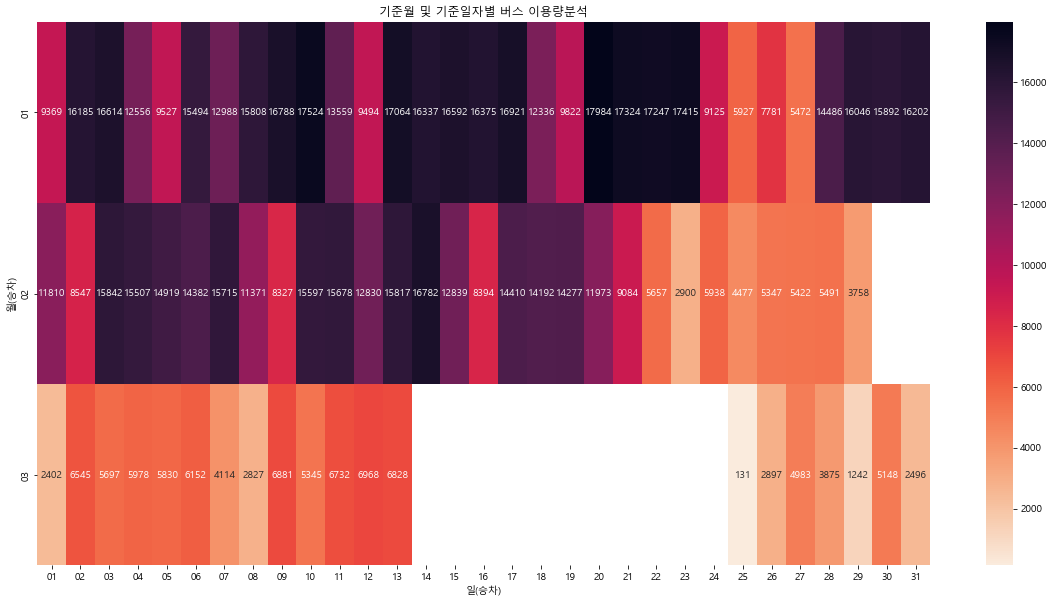

In [19]:
plt.rc('font', family = 'Malgun Gothic', size = 10)
plt.figure(figsize=(20,10))
sns.heatmap(df_total_p, annot = True, fmt='.0f', cmap='rocket_r')
plt.title('기준월 및 기준일자별 버스 이용량분석')
plt.show()

In [ ]:
# 시각화2

In [20]:
df_total_pv = df_total.pivot_table(values = '승차시각',
                    columns='월(승차)',
                    index = '일(승차)',
                    aggfunc = 'count')
df_total_pv.fillna(0)

월(승차),01,02,03
일(승차),,,
01,9369.0,11810.0,2402.0
02,16185.0,8547.0,6545.0
03,16614.0,15842.0,5697.0
04,12556.0,15507.0,5978.0
05,9527.0,14919.0,5830.0
06,15494.0,14382.0,6152.0
07,12988.0,15715.0,4114.0
08,15808.0,11371.0,2827.0
09,16788.0,8327.0,6881.0


<AxesSubplot:title={'center':'버스'}, xlabel='일(승차)'>

<Figure size 5040x1080 with 0 Axes>

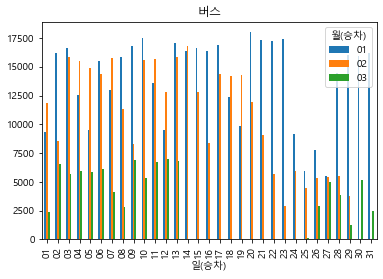

In [22]:
plt.figure(figsize=(70,15))
df_total_pv.plot(kind = 'bar',title = '버스')

In [ ]:
# 2013년 1월이 2,3월에 비해 승객 수가 많음.
# 3월 중순에 이용객이 없음

- 기준일 및 시간대별 버스 이용량 분석 비교

In [23]:
df_total[['승차시각','일(승차)','시(승차)']]

,승차시각,일(승차),시(승차)
0,20200102051049,02,05
1,20200102051338,02,05
2,20200102051549,02,05
3,20200102051617,02,05
4,20200102051841,02,05
...,...,...,...
2491,20200331231529,31,23
2492,20200331231651,31,23
2493,20200331233806,31,23
2494,20200331234833,31,23


In [24]:
df_total_ph = df_total.pivot_table(values = '승차시각',
                    columns='시(승차)',
                    index = '일(승차)',
                    aggfunc = 'count')
df_total_ph.fillna(0)

시(승차),00,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
일(승차),,,,,,,,,,,,,,,,,,,,
01,0.0,215.0,614.0,878.0,1419.0,1393.0,1521.0,1671.0,1813.0,1800.0,1826.0,1887.0,1668.0,1703.0,1476.0,1114.0,950.0,876.0,620.0,137.0
02,0.0,200.0,684.0,1424.0,2103.0,2139.0,2119.0,2301.0,2295.0,2420.0,2416.0,2538.0,2297.0,2242.0,1889.0,1203.0,1085.0,1009.0,762.0,151.0
03,0.0,281.0,892.0,1988.0,2631.0,2627.0,2675.0,2788.0,2700.0,2935.0,2907.0,3087.0,2922.0,2725.0,2406.0,1388.0,1130.0,1091.0,802.0,178.0
04,0.0,259.0,909.0,1800.0,2247.0,2224.0,2370.0,2466.0,2649.0,2605.0,2520.0,2645.0,2638.0,2514.0,1998.0,1226.0,1087.0,1015.0,712.0,157.0
05,0.0,240.0,762.0,1441.0,1922.0,1962.0,2047.0,2140.0,2241.0,2338.0,2360.0,2456.0,2311.0,2215.0,1893.0,1163.0,1027.0,997.0,654.0,107.0
06,0.0,272.0,960.0,2058.0,2677.0,2620.0,2425.0,2677.0,2611.0,2748.0,2893.0,2863.0,2642.0,2498.0,2071.0,1213.0,1034.0,901.0,719.0,146.0
07,0.0,234.0,825.0,1685.0,2295.0,2317.0,2285.0,2373.0,2311.0,2373.0,2509.0,2508.0,2446.0,2409.0,2049.0,1246.0,1054.0,1031.0,725.0,142.0
08,0.0,213.0,644.0,1336.0,1854.0,1879.0,1984.0,2179.0,2256.0,2299.0,2362.0,2392.0,2267.0,2239.0,1943.0,1186.0,1073.0,1026.0,722.0,152.0
09,0.0,235.0,719.0,1539.0,2043.0,2164.0,2163.0,2252.0,2369.0,2443.0,2520.0,2607.0,2436.0,2298.0,2001.0,1219.0,1116.0,1053.0,662.0,157.0


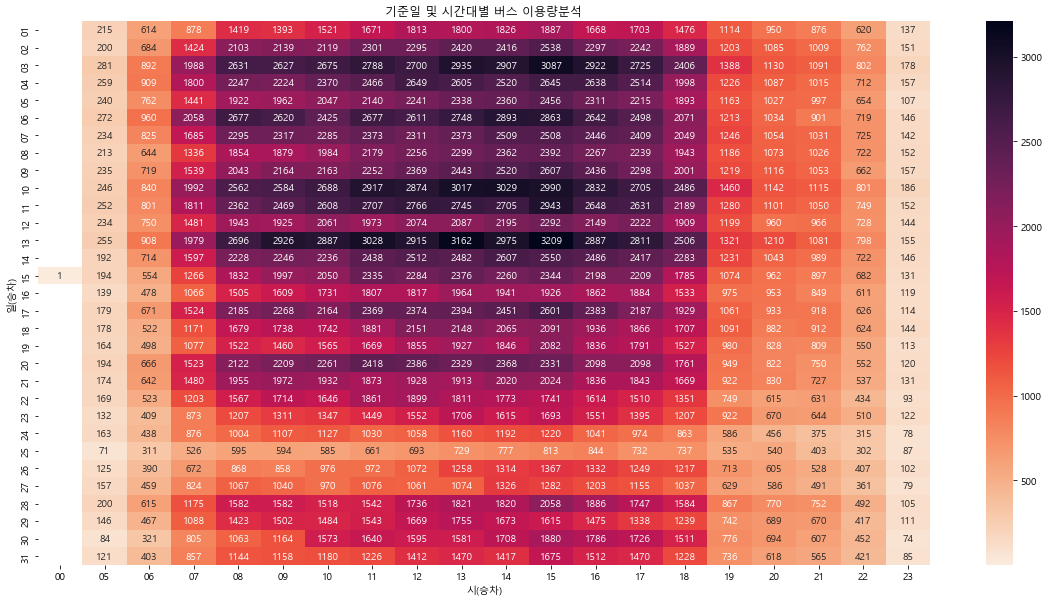

In [25]:
plt.rc('font', family = 'Malgun Gothic', size = 10)
plt.figure(figsize=(20,10))
sns.heatmap(df_total_ph, annot = True, fmt='.0f', cmap='rocket_r')
plt.title('기준일 및 시간대별 버스 이용량분석')
plt.show()

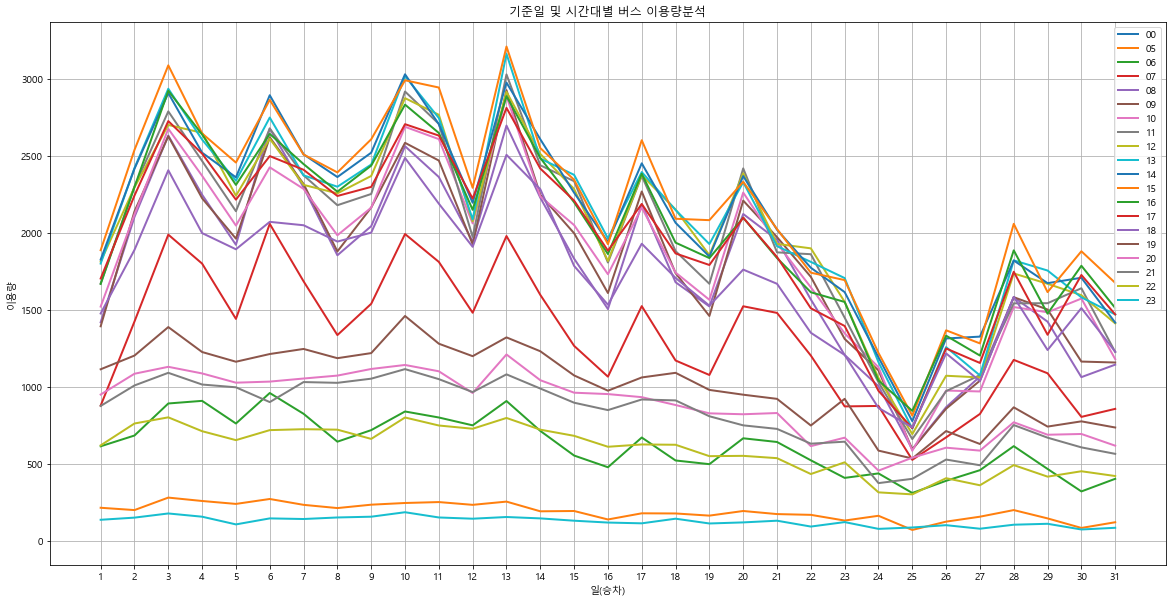

In [26]:
# 그래프 크기 지정하기 = 너비, 높이
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['lines.linewidth'] = 2
plt.rc("font", family = "Malgun Gothic", size=10)
df_total_ph.plot()

plt.title("기준일 및 시간대별 버스 이용량분석")
plt.ylabel("이용량")

a = range(-1,32,1)
plt.xticks([i for i in range(0,31,1)],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])


plt.legend(loc="upper right")
plt.grid(True)

plt.show()

> 분석

In [ ]:
# 2~15일에 7~17시 사이의 승차수가 많다.
# 00시에는 이용객이 없고 18시 부터 점점 이용객이 주는 것을 확인

- 기준시간 및 시간(분)별 버스 이용량 분석 비교

In [27]:
df_total_pm = df_total.pivot_table(values = '승차시각',
                    columns='분(승차)',
                    index = '시(승차)',
                    aggfunc = 'count')
df_total_pm.fillna(0)

분(승차),00,01,02,03,04,05,06,07,08,09,...,50,51,52,53,54,55,56,57,58,59
시(승차),,,,,,,,,,,,,,,,,,,,,
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,167.0,245.0,195.0,200.0,193.0,250.0,189.0,235.0,259.0,243.0
06,248.0,237.0,186.0,211.0,252.0,244.0,214.0,255.0,232.0,354.0,...,399.0,452.0,414.0,349.0,399.0,374.0,400.0,387.0,470.0,442.0
07,434.0,391.0,390.0,422.0,371.0,451.0,431.0,481.0,593.0,480.0,...,906.0,939.0,856.0,807.0,747.0,774.0,860.0,1106.0,891.0,1159.0
08,1039.0,872.0,1008.0,1025.0,812.0,1122.0,864.0,819.0,800.0,913.0,...,905.0,811.0,830.0,974.0,993.0,907.0,1008.0,1060.0,932.0,1023.0
09,1130.0,1114.0,1119.0,973.0,1024.0,1103.0,831.0,950.0,926.0,850.0,...,1094.0,901.0,960.0,820.0,754.0,875.0,792.0,823.0,1000.0,837.0
10,878.0,808.0,918.0,890.0,827.0,1009.0,928.0,969.0,1042.0,859.0,...,1184.0,989.0,890.0,1137.0,881.0,947.0,1058.0,1042.0,1141.0,1135.0
11,898.0,1134.0,1060.0,872.0,1143.0,1078.0,1034.0,1097.0,1003.0,1036.0,...,1053.0,871.0,1019.0,1024.0,907.0,1281.0,1212.0,1115.0,1163.0,1020.0
12,984.0,1029.0,1070.0,1157.0,1098.0,1131.0,1167.0,1117.0,1198.0,1048.0,...,996.0,1007.0,963.0,966.0,904.0,974.0,1133.0,959.0,902.0,1204.0


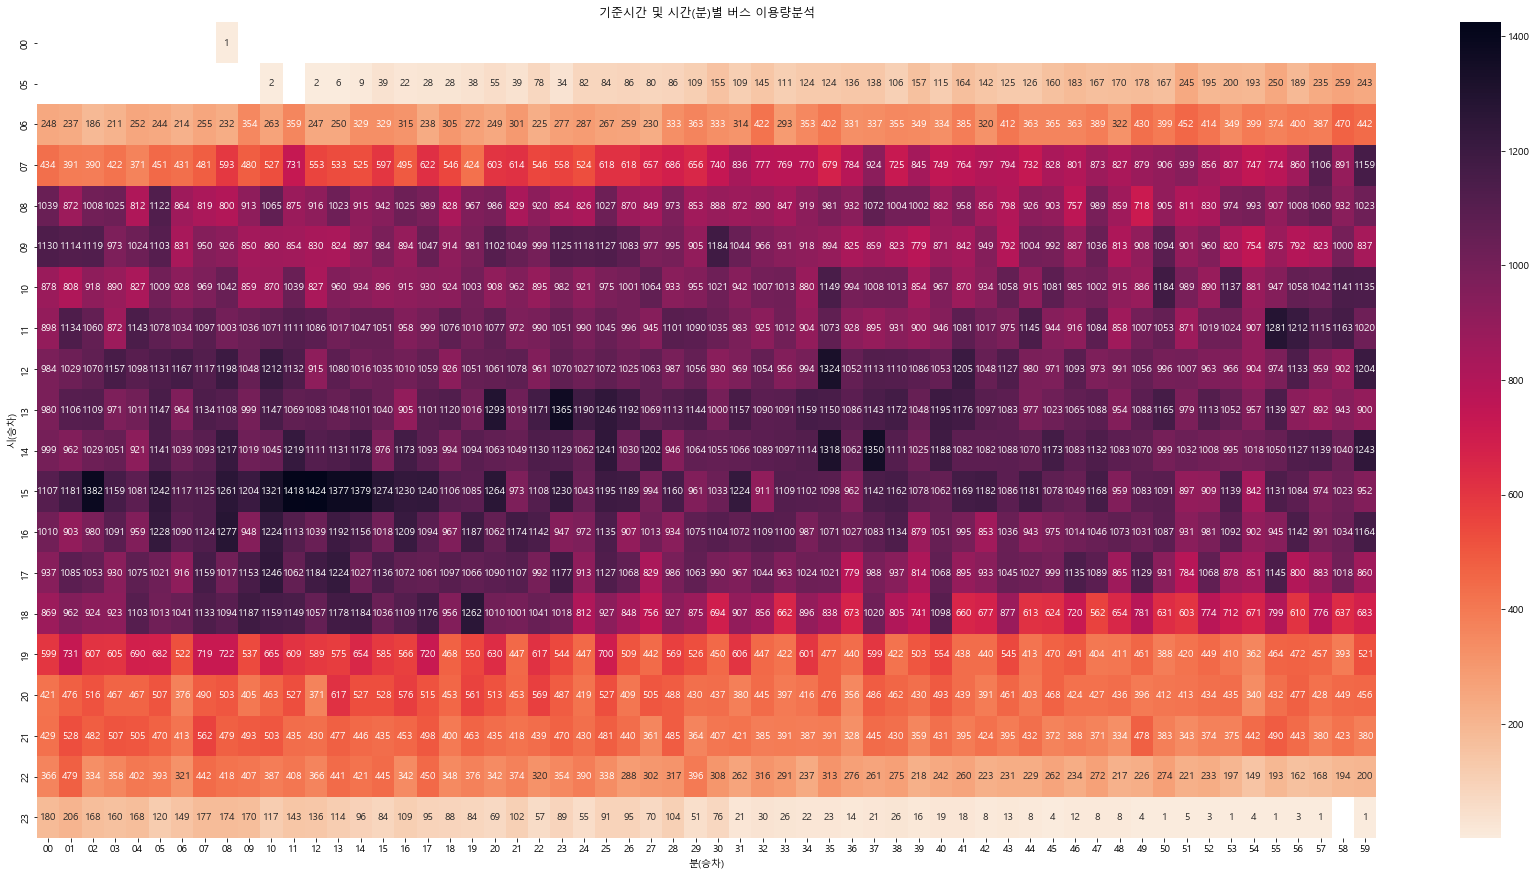

In [28]:
plt.rc('font', family = 'Malgun Gothic', size = 10)
plt.figure(figsize=(30,15))
sns.heatmap(df_total_pm, annot = True, fmt='.0f', cmap='rocket_r')
plt.title('기준시간 및 시간(분)별 버스 이용량분석')
plt.show()

In [ ]:
# 8~18시는 모든 분단위로 탑승객 수가 많음
# 00시부터 05시와 23시는 탑승객수가 적음

### 2. 버스 내 체류시간 분석

> 기준일 및 시간대별 버스내 체류시간(분) 분석비교

In [46]:
df_total['시(승차)'] = df_total['시(승차)'].astype(int)
df_total['분(승차)'] = df_total['분(승차)'].astype(int)
df_total['체류시간(분)'] = df_total['시(승차)'] * 60 + df_total['분(승차)']
df_total.head()

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,...,분(승차),초(승차),년(하차),월(하차),일(하차),시(하차),분(하차),초(하차),체류시간(분),승하차정류장
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,...,10,49,2020,01,02,05,18,44,310,양덕차고지 - 동부초등학교
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,...,13,38,2020,01,02,05,45,49,313,문덕사거리 - 새마을금고해도지점
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,...,15,49,2020,01,02,05,19,30,315,문덕사거리 - 성우오토모티브
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,...,16,17,2020,01,02,05,50,46,316,부영사랑3차 - 오거리
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,...,18,41,2020,01,02,05,23,10,318,문덕온천 - 용덕사거리


In [31]:
df_total_pivot = df_total.pivot_table(values = '체류시간(분)',
                                      index = '일(승차)',
                                      columns = '시(승차)',
                                      aggfunc = 'sum')
df_total_pivot                  

시(승차),0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
일(승차),,,,,,,,,,,,,,,,,,,,
01,NaN,73749.0,240040.0,398478.0,723140.0,791485.0,959978.0,1153699.0,1357199.0,1456058.0,1587174.0,1751359.0,1649585.0,1786680.0,1636338.0,1300764.0,1168001.0,1128127.0,834147.0,191215.0
02,NaN,68432.0,268118.0,645865.0,1072970.0,1218065.0,1334641.0,1586310.0,1721025.0,1959259.0,2100081.0,2355888.0,2271577.0,2350219.0,2089613.0,1403196.0,1332274.0,1299973.0,1024701.0,210311.0
03,NaN,96346.0,350438.0,901606.0,1340077.0,1493983.0,1684670.0,1922495.0,2023254.0,2375676.0,2529410.0,2866004.0,2890534.0,2857998.0,2659717.0,1618683.0,1388098.0,1405378.0,1078639.0,248130.0
04,NaN,89154.0,356883.0,814809.0,1143966.0,1264301.0,1493027.0,1698653.0,1985039.0,2107521.0,2191044.0,2456184.0,2608537.0,2635815.0,2211362.0,1430269.0,1334359.0,1307790.0,958064.0,218704.0
05,NaN,82323.0,298341.0,650930.0,977968.0,1115801.0,1287945.0,1474957.0,1679562.0,1891455.0,2052457.0,2281943.0,2285739.0,2323691.0,2094441.0,1357275.0,1262746.0,1284532.0,879373.0,149247.0
06,NaN,92984.0,377347.0,934562.0,1363323.0,1490564.0,1528231.0,1846446.0,1956066.0,2223271.0,2516231.0,2656843.0,2614892.0,2619498.0,2290825.0,1416200.0,1270460.0,1160686.0,967549.0,203418.0
07,NaN,80398.0,323558.0,764784.0,1168925.0,1318183.0,1439908.0,1634715.0,1731075.0,1920160.0,2183333.0,2329836.0,2421483.0,2526710.0,2267853.0,1454971.0,1296053.0,1328667.0,975030.0,198218.0
08,NaN,72805.0,252495.0,605945.0,945188.0,1068103.0,1251452.0,1503806.0,1689453.0,1860695.0,2054332.0,2222610.0,2243482.0,2348959.0,2150259.0,1383363.0,1318712.0,1321193.0,971439.0,211992.0
09,NaN,80570.0,281661.0,697159.0,1039615.0,1230909.0,1363010.0,1552589.0,1774522.0,1976563.0,2191599.0,2419913.0,2410813.0,2410099.0,2214155.0,1423199.0,1371599.0,1355867.0,890595.0,218888.0


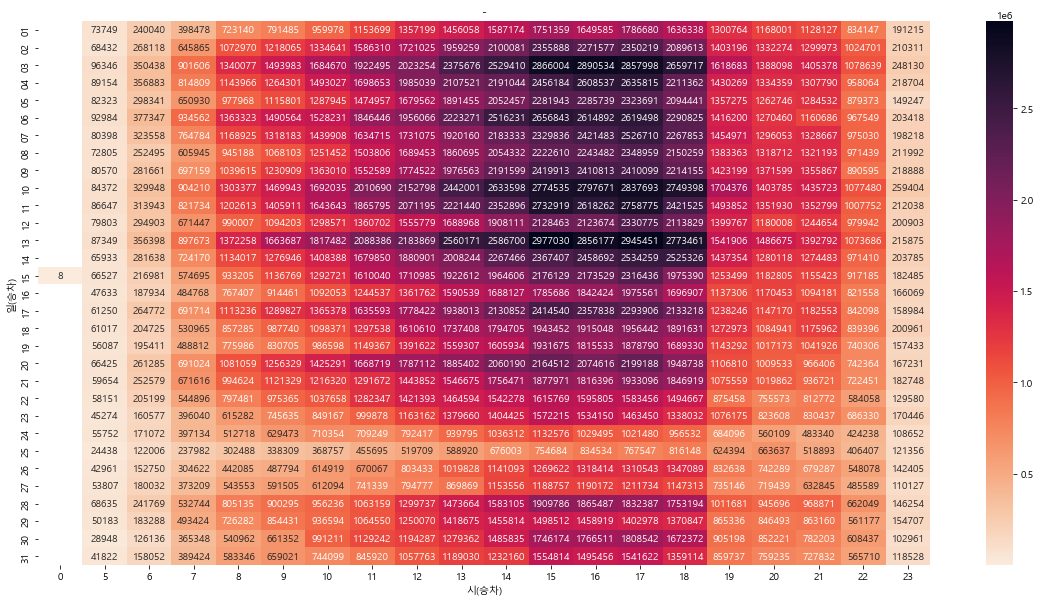

In [47]:
plt.figure(figsize=(20,10))
plt.rc("font", family = "Malgun Gothic", size=10)
sns.heatmap(df_total_pivot, annot=True, fmt='.0f', cmap='rocket_r')
plt.title("-")
plt.show()

In [ ]:
# 14시에서 18시에 탑승객의 체류시간이 길다.

> 시간 및 승객구분별 빈도분석 비교

In [ ]:
df_total

In [33]:
df_total['승객연령']
df_total['승객연령'].value_counts()

일반      772599
청소년      59037
어린이      10047
None       925
Name: 승객연령, dtype: int64

In [34]:
df_total_fre=df_total.pivot_table(index = '승객연령',columns='시(승차)',values = '승차시각', aggfunc='count')
df_total_fre.fillna(0)

시(승차),0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
승객연령,,,,,,,,,,,,,,,,,,,,
None,0.0,3.0,35.0,42.0,56.0,68.0,81.0,96.0,96.0,79.0,87.0,86.0,63.0,52.0,33.0,23.0,16.0,5.0,4.0,0.0
어린이,0.0,9.0,36.0,230.0,479.0,477.0,595.0,740.0,965.0,991.0,959.0,939.0,954.0,850.0,651.0,436.0,322.0,219.0,177.0,18.0
일반,1.0,5733.0,18478.0,38718.0,52378.0,53790.0,54361.0,56759.0,57125.0,58734.0,59741.0,61721.0,56627.0,54667.0,48039.0,28376.0,24563.0,22813.0,16328.0,3647.0
청소년,0.0,173.0,840.0,2025.0,2389.0,2423.0,2883.0,3667.0,4742.0,5066.0,4603.0,4964.0,5378.0,5234.0,4261.0,2921.0,2564.0,2691.0,1960.0,253.0


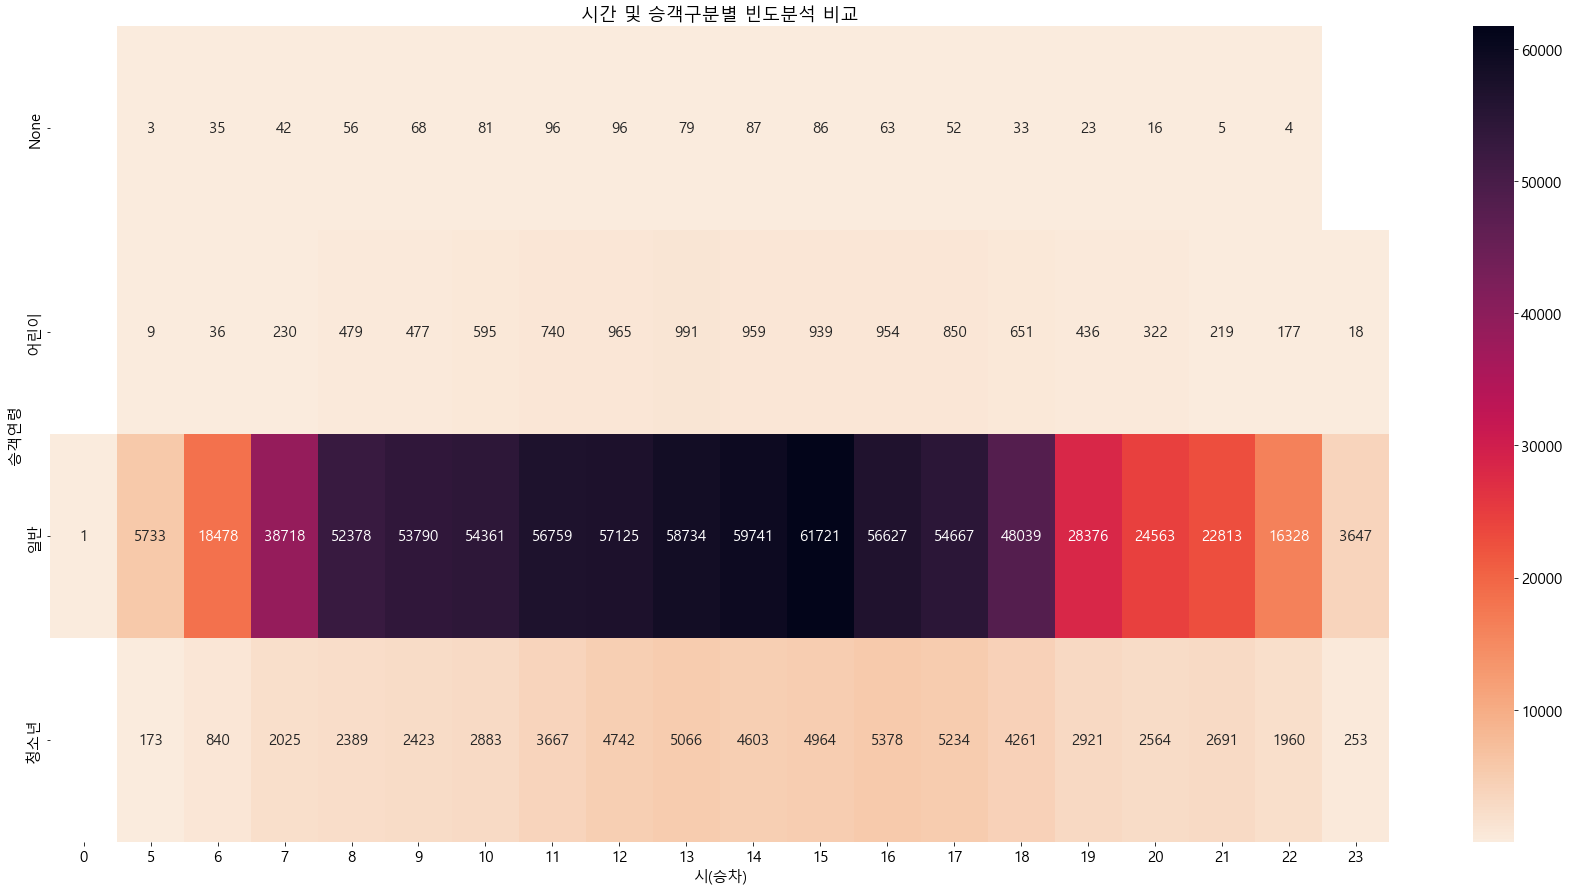

In [35]:
plt.rc('font', family = 'Malgun Gothic', size = 15)
plt.figure(figsize=(30,15))
sns.heatmap(df_total_fre, annot = True, fmt='.0f', cmap='rocket_r')
plt.title('시간 및 승객구분별 빈도분석 비교')
plt.show()

In [36]:
df_total_fre2=df_total.pivot_table(index = '시(승차)',columns='승객연령',values = '승차시각', aggfunc='count')
df_total_fre2.fillna(0)

승객연령,None,어린이,일반,청소년
시(승차),,,,
0,0.0,0.0,1.0,0.0
5,3.0,9.0,5733.0,173.0
6,35.0,36.0,18478.0,840.0
7,42.0,230.0,38718.0,2025.0
8,56.0,479.0,52378.0,2389.0
9,68.0,477.0,53790.0,2423.0
10,81.0,595.0,54361.0,2883.0
11,96.0,740.0,56759.0,3667.0
12,96.0,965.0,57125.0,4742.0


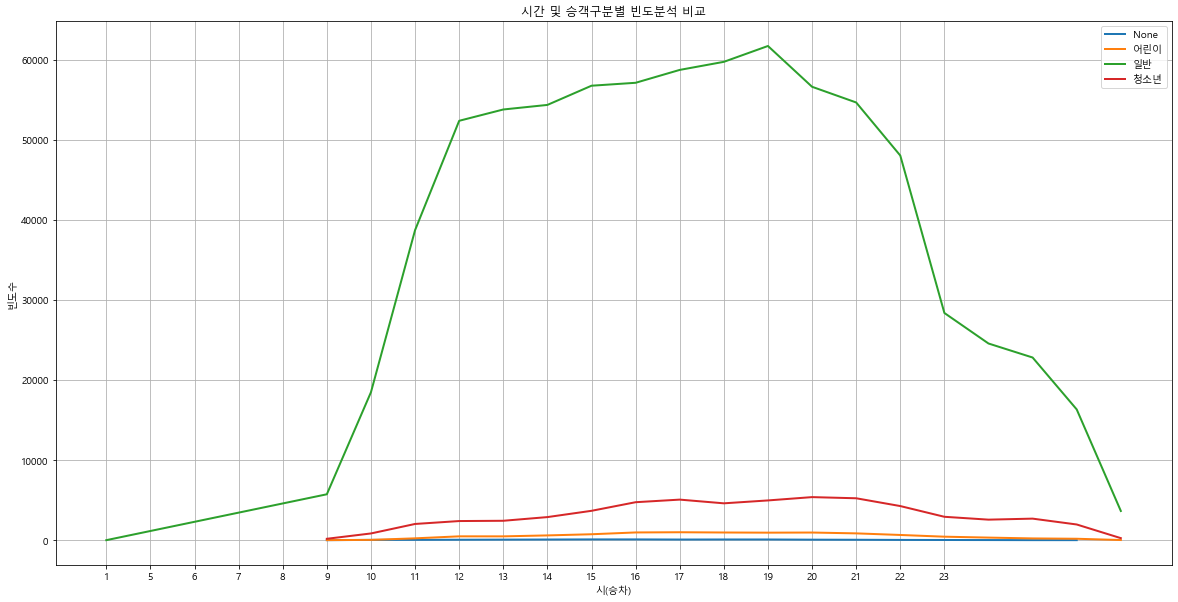

In [37]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['lines.linewidth'] = 2
plt.rc("font", family = "Malgun Gothic", size=10)
df_total_fre2.plot()

plt.title("시간 및 승객구분별 빈도분석 비교")
plt.ylabel("빈도수")

a = range(-1,32,1)
plt.xticks([i for i in range(0,20,1)],[1,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])


plt.legend(loc="upper right")
plt.grid(True)

plt.show()

In [ ]:
# 승객연령 컬럼의 None 값은 노인으로 추측
# 일반의 탑승 수가 확연히 높음을 알 수 있음

### 3. 승하차 정류장별 버스내 제류시간 분석
- 승하차 정류장별 체류시간(분) 상위 30건 분석 비교

In [38]:
df_total['승하차정류장'] = df_total['승차정류장']+ ' - ' +df_total['하차정류장']

In [39]:
df_time=df_total[['승하차정류장','소요시각']].groupby('승하차정류장').sum().reset_index().sort_values('소요시각',ascending=False)
df_time

,승하차정류장,소요시각
14059,시외버스터미널 - 죽도시장,74 days 10:26:10
27379,흥해환승센터 - 죽도시장,45 days 21:56:22
27385,흥해환승센터 - 중앙상가,33 days 14:57:33
21204,죽도시장 - 흥해환승센터,30 days 21:43:23
13820,시외버스터미널 - 구룡포환승센터,28 days 20:40:18
...,...,...
1517,계원 - 계원,0 days 00:00:10
1049,감포진성숯불가든 - 감포진성숯불가든,0 days 00:00:10
16195,영보빌라 - 영보빌라,0 days 00:00:10
14720,안강동부터미널 - 안강동부터미널,0 days 00:00:10


In [40]:
df_time_30 = df_time.reset_index(drop=True).head(30)
df_time_30

,승하차정류장,소요시각
0,시외버스터미널 - 죽도시장,74 days 10:26:10
1,흥해환승센터 - 죽도시장,45 days 21:56:22
2,흥해환승센터 - 중앙상가,33 days 14:57:33
3,죽도시장 - 흥해환승센터,30 days 21:43:23
4,시외버스터미널 - 구룡포환승센터,28 days 20:40:18
5,두호초등학교 - 죽도시장,28 days 17:24:02
6,문덕사거리 - 시외버스터미널,28 days 14:04:37
7,구룡포근대화거리 - 시외버스터미널,28 days 08:09:51
8,장성초등학교 - 죽도시장,27 days 12:14:02
9,경북자동차학원 - 죽도시장,26 days 14:20:59


In [41]:
# df_time_30['소요일'] = df_time_30['소요시간'].astype('timedelta64[D]')
# df_time_30['소요시'] = df_time_30['소요시간'].astype('timedelta64[h]')
# df_time_30['소요분'] = df_time_30['소요시간'].astype('timedelta64[m]')
df_time_30['소요시각(초)'] = df_time_30['소요시각'].astype('timedelta64[s]')

In [42]:
df_time_30_total = df_time_30[['승하차정류장','소요시각(초)']]
df_time_30_total

,승하차정류장,소요시각(초)
0,시외버스터미널 - 죽도시장,6431170.0
1,흥해환승센터 - 죽도시장,3966982.0
2,흥해환승센터 - 중앙상가,2905053.0
3,죽도시장 - 흥해환승센터,2670203.0
4,시외버스터미널 - 구룡포환승센터,2493618.0
5,두호초등학교 - 죽도시장,2481842.0
6,문덕사거리 - 시외버스터미널,2469877.0
7,구룡포근대화거리 - 시외버스터미널,2448591.0
8,장성초등학교 - 죽도시장,2376842.0
9,경북자동차학원 - 죽도시장,2298059.0


In [43]:
k = []
for x in range(len(df_time_30)):
    k.append(df_time_30['승하차정류장'][x])
k

['시외버스터미널 - 죽도시장',
 '흥해환승센터 - 죽도시장',
 '흥해환승센터 - 중앙상가',
 '죽도시장 - 흥해환승센터',
 '시외버스터미널 - 구룡포환승센터',
 '두호초등학교 - 죽도시장',
 '문덕사거리 - 시외버스터미널',
 '구룡포근대화거리 - 시외버스터미널',
 '장성초등학교 - 죽도시장',
 '경북자동차학원 - 죽도시장',
 '장량5단지 - 죽도시장',
 '상대시장 - 죽도시장',
 '구룡포환승센터 - 시외버스터미널',
 '해병대서문 - 죽도시장',
 '기계환승센터 - 농협포항시지부',
 '죽도시장 - 구룡포환승센터',
 '중앙상가 - 시외버스터미널',
 '풍림아이원 - 죽도시장',
 '구룡포환승센터 - 죽도시장',
 '준양참마을 - 시외버스터미널',
 '장성초등학교 - 중앙상가',
 'KTX포항역(시내행) - 죽도시장',
 '구룡포근대화거리 - 죽도시장',
 '풍림아이원 - 중앙상가',
 '장량휴먼시아 - 죽도시장',
 '오천농협세계지점 - 죽도시장',
 '환호해맞이그린빌 - 죽도시장',
 '경북자동차학원 - 시외버스터미널',
 '동해면사무소 - 죽도시장',
 '기계환승센터 - 시외버스터미널']

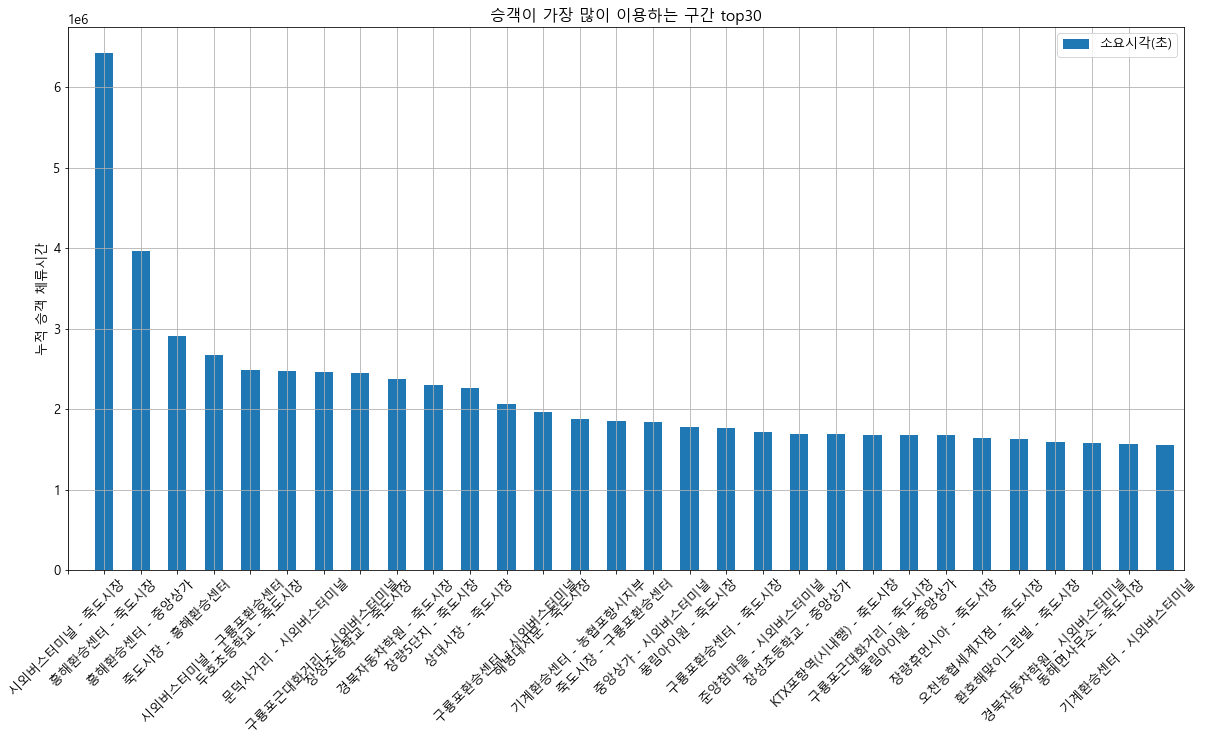

In [44]:
# 그래프 크기 지정하기 = 너비, 높이
plt.rcParams['figure.figsize'] = (20, 10)
# 선의 두께 지정
plt.rcParams['lines.linewidth'] = 2
# 폰트지정
plt.rc("font", family = "Malgun Gothic", size=13)

# 데이터 넣기
df_time_30_total.plot(kind='bar')

plt.title("승객이 가장 많이 이용하는 구간 top30")
plt.ylabel("누적 승객 체류시간")

# x축 범위?
a = list(range(0,29,1))
plt.xticks([i for i in range(-1,29,1)], k, rotation = 45)

# 범례 위치 변경하기
plt.legend(loc="upper right")
# 그래프 내에 그리드선 표시하기
plt.grid(True)

plt.show()

In [45]:
df_total.to_csv('./포항/df_total_1.csv', index=False)